# Obesity Dataset Exploration and Predictive Model Development


https://www.kaggle.com/datasets/heiselmentado/cervical-cancer

# Welcome to the notebook! Here's what we aim to accomplish:

Exploratory Data Analysis (EDA):
We'll conduct a thorough analysis of an obesity dataset to uncover important factors that influence obesity levels. This involves exploring relationships between various features and the target variable, gaining insights into trends, distributions, and potential correlations.

Machine Learning Model Development:
Our goal is to build a robust machine learning model capable of accurately predicting obesity levels based on the identified predictors. This phase involves data preprocessing, feature selection, model training, evaluation, and fine-tuning to achieve optimal performance.

Let's dive in and explore the data to uncover valuable insights and develop a predictive model for obesity levels!

In [63]:
import warnings
import re
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import zipfile 
import urllib.request
from pathlib import Path
import os
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV, KFold
from typing import Union, Tuple, List, TypeVar
from collections import namedtuple
from itertools import combinations
import textwrap
from IPython import display
import pingouin
import statsmodels.api as sm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay, classification_report
import cloudpickle

In [64]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [65]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [66]:
def unzip_and_open_dataset(zip_file_path):
    '''Extracts zip file and reads into pandas dataframe.'''
    
    data_directory = Path('datasets') / os.path.splitext(zip_file_path)[0]
    if not data_directory.is_dir():
        data_directory.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(zip_file_path) as zip_file:
        zip_file.extractall(data_directory)
    
    csv_file = [file for file in os.listdir(data_directory) if file.endswith('.csv')][0]
        
    return pd.read_csv(data_directory/csv_file)

In [67]:
obesity = unzip_and_open_dataset('obesity.zip')

# Attributes

The attributes related to eating habits are:
* Frequent consumption of high-caloric food (FAVC),
* Frequency of consumption of vegetables (FCVC),
* Number of main meals (NCP),
* Consumption of food between meals (CAEC),
* Consumption of water daily (CH20), and
* Consumption of alcohol (CALC).

The attributes related to the physical condition are:
* Calories consumption monitoring (SCC),
* Physical activity frequency (FAF),
* Time using technology devices (TUE), and
* Transportation used (MTRANS),

Other variables: Gender, Age, Height, and Weight.

Label. <br>
Obesity: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III

In [68]:
obesity.columns = ['gender', 'age', 'height', 'weight', 'family_history_overweight',
       'frequent_high_caloric_food_consumption', 'vegetable_consumption_frequency',
        'number_of_main_meals', 'consumption_of_food_between_meals', 'SMOKE', 'daily_water_consumption',
        'calories_consumption_monitoring', 'physical_activity_frequency', 'time_using_technology_devices',
       'alcohol_consumption', 'transportation_used', 'obesity_level']

In [69]:
obesity.head()

,gender,age,height,weight,family_history_overweight,frequent_high_caloric_food_consumption,vegetable_consumption_frequency,number_of_main_meals,consumption_of_food_between_meals,SMOKE,daily_water_consumption,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,alcohol_consumption,transportation_used,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [70]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  2111 non-null   object 
 1   age                                     2111 non-null   float64
 2   height                                  2111 non-null   float64
 3   weight                                  2111 non-null   float64
 4   family_history_overweight               2111 non-null   object 
 5   frequent_high_caloric_food_consumption  2111 non-null   object 
 6   vegetable_consumption_frequency         2111 non-null   float64
 7   number_of_main_meals                    2111 non-null   float64
 8   consumption_of_food_between_meals       2111 non-null   object 
 9   SMOKE                                   2111 non-null   object 
 10  daily_water_consumption                 2111 non-null   floa

In [71]:
obesity.isna().sum()

gender                                    0
age                                       0
height                                    0
weight                                    0
family_history_overweight                 0
frequent_high_caloric_food_consumption    0
vegetable_consumption_frequency           0
number_of_main_meals                      0
consumption_of_food_between_meals         0
SMOKE                                     0
daily_water_consumption                   0
calories_consumption_monitoring           0
physical_activity_frequency               0
time_using_technology_devices             0
alcohol_consumption                       0
transportation_used                       0
obesity_level                             0
dtype: int64

In [72]:
obesity.select_dtypes(include=object).apply(lambda col: col.unique())

gender                                                                       [Female, Male]
family_history_overweight                                                         [yes, no]
frequent_high_caloric_food_consumption                                            [no, yes]
consumption_of_food_between_meals                       [Sometimes, Frequently, Always, no]
SMOKE                                                                             [no, yes]
calories_consumption_monitoring                                                   [no, yes]
alcohol_consumption                                     [no, Sometimes, Frequently, Always]
transportation_used                       [Public_Transportation, Walking, Automobile, M...
obesity_level                             [Normal_Weight, Overweight_Level_I, Overweight...
dtype: object

In [73]:
obesity['transportation_used'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [74]:
obesity['obesity_level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Not only did we examine categories' attributes but also made sure no hidden NAs are present.

In [75]:
obesity['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

No pronounced imbalance. 

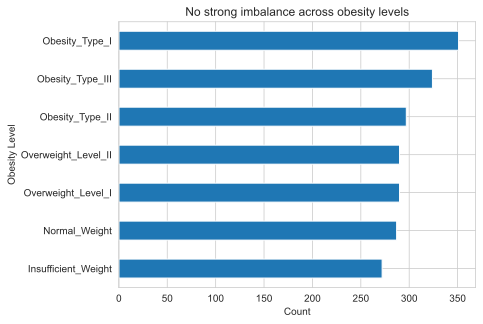

In [76]:
obesity['obesity_level'].value_counts().sort_values().plot.barh(grid=True,
                                                                title='No strong imbalance across obesity levels', 
                                                                xlabel = 'Count', 
                                                                ylabel = 'Obesity Level');

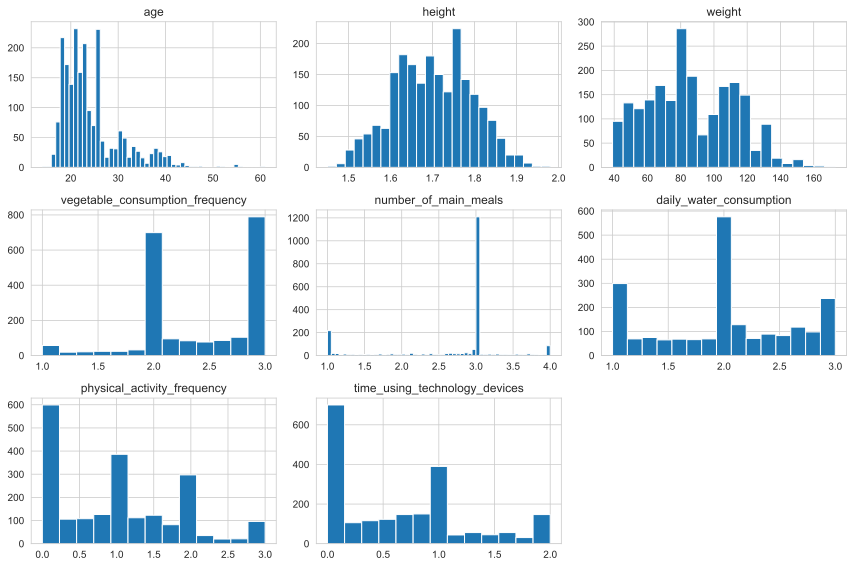

In [77]:
obesity.hist(bins='fd', figsize=(12, 8))
plt.tight_layout()
plt.show();

To mitigate the risk of data snooping bias, it's essential to conduct a train-test split before engaging in Exploratory Data Analysis (EDA).

Considering the potential expansion of the dataset in the future, where additional data may be collected by researchers, it's crucial to establish a consistent approach. Any analyses conducted presently will likely require repetition to incorporate new observations at a later stage. Therefore, it's imperative to ensure that all data points allocated to the training set during the current stage remain within the training set for subsequent analyses, even when the dataset is expanded.

To ensure this consistency, we'll first generate a unique identifier for each data point and compute its hash value using CRC (Cyclic Redundancy Check). This method will help maintain the integrity of the data splits and ensure that the same data points remain assigned to the training set across different iterations of analysis, including future expansions of the dataset.

In [78]:
from zlib import crc32

def _id_in_the_test_set(identifier: Union[int, float], test_ratio: float) -> bool:
    """Assigns identifier to either test or train set based on hash value."""
    
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32


def split_data_with_id_hash(data: pd.DataFrame, test_ratio: float, id_column: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Splits data into train and test set based on hashe values of identifiers."""
    
    in_the_test_set = data[id_column].apply(lambda row_id: _id_in_the_test_set(row_id, test_ratio))
    return data.loc[~in_the_test_set], data.loc[in_the_test_set]

In [79]:
# Create a custom transformer to reuse on new data
create_identifier = FunctionTransformer(lambda x: x['age'] * x['height'] * x['weight'])

obesity['id'] = create_identifier.transform(obesity)

train_set, test_set = split_data_with_id_hash(obesity, .2, 'id')

In [80]:
for set_ in (train_set, test_set):
    set_.drop('id', axis=1, inplace=True)

# EDA
## Raw Data

In [81]:
obesity_explore = train_set.copy()

In [82]:
obesity_explore.select_dtypes(include=object).head()

,gender,family_history_overweight,frequent_high_caloric_food_consumption,consumption_of_food_between_meals,SMOKE,calories_consumption_monitoring,alcohol_consumption,transportation_used,obesity_level
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [83]:
obesity_explore.select_dtypes(include=np.number).head()

,age,height,weight,vegetable_consumption_frequency,number_of_main_meals,daily_water_consumption,physical_activity_frequency,time_using_technology_devices
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


Potentially important features for accounting and predicting obesity levels are spread across both numerical and categorical variables. Without any data manipulation it might be difficult to detect interesting patterns or relationships. 

Moreover, features like vegetable consumption frequency, number of main meals, daily water consumption, physical activity frequency and time using technology devices seem to be continuous, but probably should be discrete, ordinal variables.

Before we perform any data engineering however, let's see what can we learn from the data as it is.

## Numerical Features

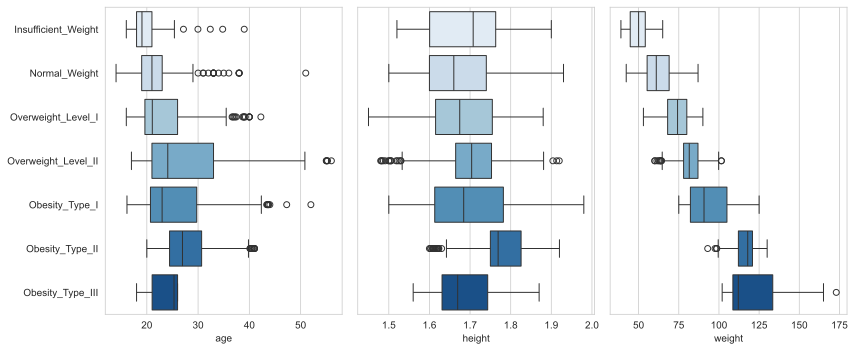

In [84]:
fig, ax = plt.subplots(ncols=3, figsize=(12,5))

order = ['Insufficient_Weight','Normal_Weight',
         'Overweight_Level_I','Overweight_Level_II',
         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

columns = ['age', 'height', 'weight']

for i, column in enumerate(columns):        
    sns.boxplot(data=obesity_explore,
                x=column,
                y='obesity_level',
                color='white',
                order=order,
                orient='h',
                palette='Blues',
                ax=ax[i])
    ax[i].set_ylabel(None)
    
    if i > 0:
        ax[i].axes.get_yaxis().set_visible(False)
        
plt.tight_layout()
plt.show();

The most prominent and somewhat expected trend is the robust correlation between Obesity Level and Weight. Additionally, there are observable distinctions in median age values across different obesity levels, although the relationship is not as straightforward.

As for the remaining variables, they are not truly continuous and thus are unsuitable for representation via boxplotsFor instnace, t Take a look at a number of main meals:

In [85]:
obesity_explore['number_of_main_meals'].value_counts()

number_of_main_meals
3.000000    959
1.000000    166
4.000000     57
1.894384      2
1.104642      2
           ... 
3.483449      1
3.095663      1
2.845307      1
2.965494      1
1.089048      1
Name: count, Length: 514, dtype: int64

Indeed, upon closer inspection, it's evident that the majority of values for the number of main meals are concentrated around 1, 3, and 4. And what in fact might fractions here mean? 

In our subsequent analysis, we'll proceed by binning the values of the number of meals and treating this variable, along with others of similar nature, as discrete. This approach will allow us to better capture the categorical aspects of these variables and enable more meaningful comparisons and insights.

Let's now delve deeper into the distribution of weight across various obesity levels:

<Figure size 1280x960 with 0 Axes>

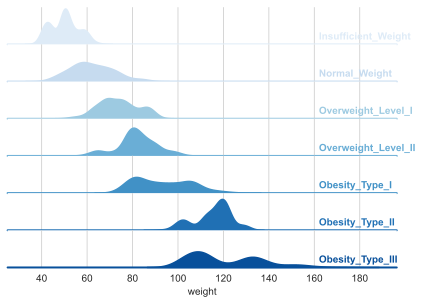

In [86]:
plt.figure(dpi=200)

grid = sns.FacetGrid(obesity_explore,
                  row='obesity_level',
                  row_order=order,
                  hue='obesity_level',
                  hue_order=order,
                  height=.65,
                  aspect=10,
                  palette='Blues')

grid.map(sns.kdeplot, 'weight', bw_adjust=1, clip_on=False, fill=True, alpha=1, lw=1.5)

grid.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.8, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
grid.map(label, "weight")

grid.figure.subplots_adjust(hspace=0)

grid.set_titles("")
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.show();

We observe a strong trend with weight increasing as obesity level increases. However, in some measure, distributions overlap and hence we need to take other features into account when predicting obesity levels. Greater weight might, for instance, be result of greater height or greater muscle volume which in turn might be linked with physical activity frequency. 

Now let's apply Kruskal-Wallis test to check if rough estimates of relationships based on plots are correct. We use Kruskal-Wallis test instead of ANOVA since ANOVA assumptions (normal distribution of predictors) are not met.  

In [87]:
KruskalResult = namedtuple('KruskalResult', ('statistic', 'pvalue'))

def kruskal_wallis(data: pd.DataFrame, ind_var: str, dep_var: str) -> KruskalResult:
    '''Prepares data and performs Kruskal-Wallis test for independent samples.'''
    
    grouped_dependent_variable_values = []

    for independent_variable_value in data.groupby(ind_var)[dep_var]:
        grouped_dependent_variable_values.append(independent_variable_value[1])

    return stats.kruskal(*grouped_dependent_variable_values)

In [88]:
kruskal_wallis(obesity_explore, 'obesity_level', 'age')

KruskalResult(statistic=424.0759826532912, pvalue=1.857650905195172e-88)

In [89]:
kruskal_wallis(obesity_explore, 'obesity_level', 'height')

KruskalResult(statistic=188.48494562661276, pvalue=5.34186981498039e-38)

In [90]:
kruskal_wallis(obesity_explore, 'obesity_level', 'weight')

KruskalResult(statistic=1465.8246852472246, pvalue=0.0)

All tests comply us to reject H0 postulating no relationships between the variables. And perhaps differences in median might have been spotted on boxplots above. Unfortunetly Kruskal-Wallis test is not a correlation test and only tests if variables show any kind, not neccessarily monotonic, relationship. What is worth to notice however is the difference by the order of magnitude in Kruskal-Wallis statistic between age and height on one hand and weight on the other -- relationship between obesity level and weight is much stronger.

Before we go on to categorical variables let's additionally examine correlations between (trully) numerical categories.

In [91]:
obesity_explore[['age', 'height', 'weight']].corr(method='spearman').style.background_gradient(cmap='coolwarm')

,age,height,weight
age,1.000000,-0.003495,0.347856
height,-0.003495,1.000000,0.465074
weight,0.347856,0.465074,1.000000


Notice week positive correlation between age and weight and moderate positive correlation between weight and height. Because of the correlation between weight and height, greater weight does not neccessarily mean greater obesity level -- the person might just be taller. Greater age might in turn be linked with diminished physical activity and hence correlate with greater weight and probably obesity level. Just to be at ease let's inspect p-values. 

In [92]:
columns = ['age', 'height', 'weight']

SignificanceResult = namedtuple('SignificanceResult', ('statistic', 'pvalue'))

def spearman_rho(data: pd.DataFrame, columns: List[str]) -> Tuple[Tuple[str], List[SignificanceResult]]:
    """Returns list of Spearman's rank correlation coefficients for every combination of the columns."""
    
    results = []
    
    for col1, col2 in combinations(columns, 2):
        result = stats.spearmanr(data[col1], data[col2])
        results.append(result)
        
    return combinations(columns, 2), results

In [93]:
combs, results = spearman_rho(obesity_explore, columns)

for i, comb in enumerate(combs):
    print(comb, results[i])

('age', 'height') SignificanceResult(statistic=-0.0034947652978961886, pvalue=0.8855774855144317)
('age', 'weight') SignificanceResult(statistic=0.3478560754104943, pvalue=1.7574312391675136e-49)
('height', 'weight') SignificanceResult(statistic=0.4650741887428742, pvalue=7.254511237955806e-92)


As expected, correlations between age and weight and heigh and weight are statistically significant but not between age and height.

## Categorical Features

In [94]:
obesity_explore.select_dtypes(include=object).head()

,gender,family_history_overweight,frequent_high_caloric_food_consumption,consumption_of_food_between_meals,SMOKE,calories_consumption_monitoring,alcohol_consumption,transportation_used,obesity_level
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


Let's visualize the relationships between categorical variables and obesity level using heatmaps.  

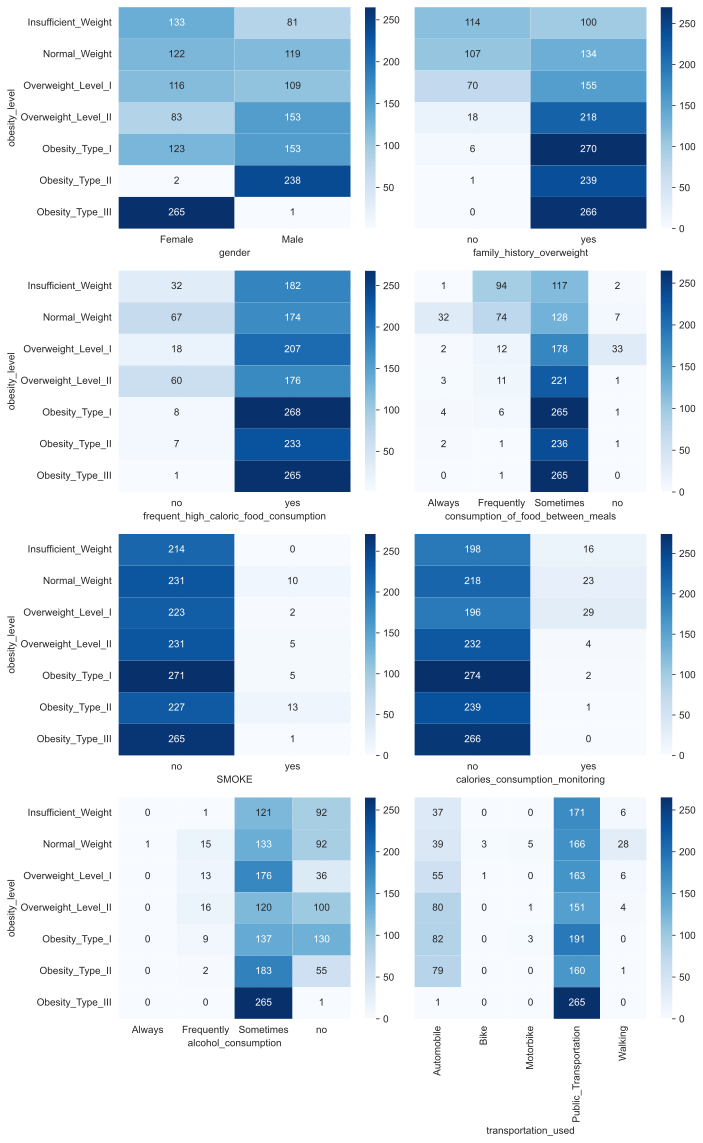

In [95]:
obesity_categorical = obesity_explore.select_dtypes(include=object)

order = ['Insufficient_Weight','Normal_Weight',
         'Overweight_Level_I','Overweight_Level_II',
         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

crosstabs = []

for column in obesity_categorical.columns[:-1]:
    crosstab = pd.crosstab(index=obesity_categorical['obesity_level'], columns=obesity_categorical[column])
    crosstab = crosstab.loc[order]
    crosstabs.append(crosstab)

fig, ax = plt.subplots(4,2, figsize=(10, 16))

for i, ax in enumerate(ax.flatten()):
    sns.heatmap(crosstabs[i],
                ax=ax,
                annot=True,
                cmap='Blues',
                yticklabels=order,
                fmt='d')
    if i % 2 != 0:
        ax.set_yticks([])
        ax.set_ylabel(None)

plt.tight_layout()
plt.show();

Different groups within are not equally represented and hence it is difficult to make judgements about relationships with obesity. To improve the situation slightly we now calculate proportions instead of counts.

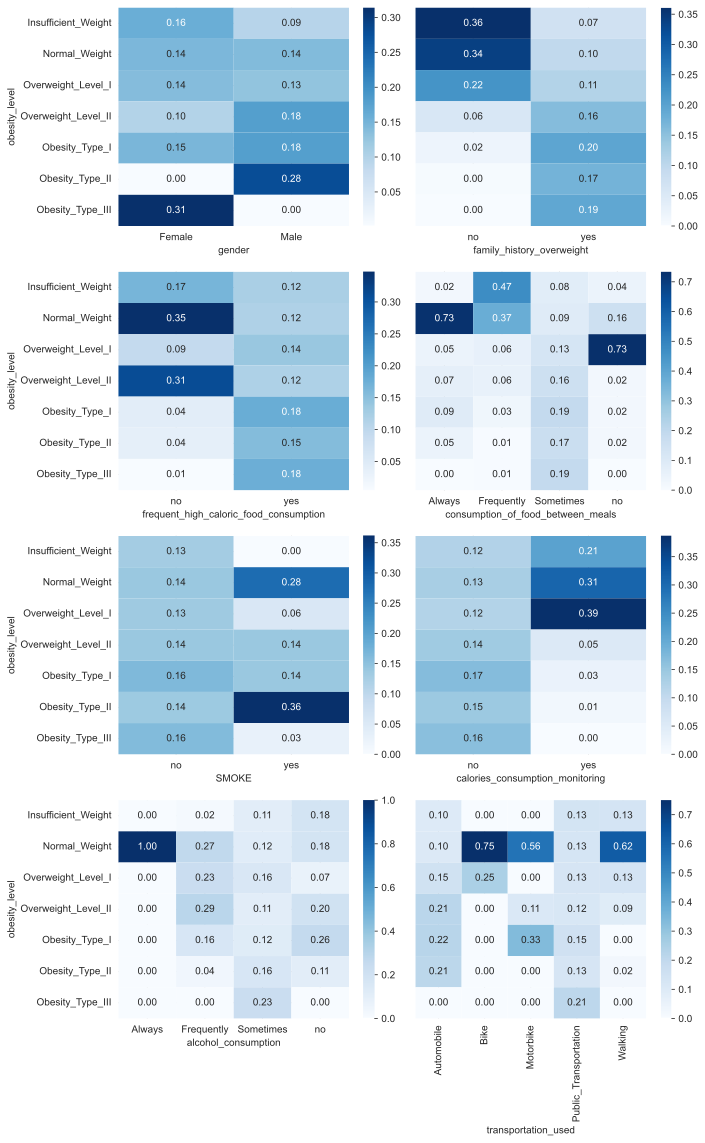

In [96]:
obesity_categorical = obesity_explore.select_dtypes(include=object)

crosstabs = []

for column in obesity_categorical.columns[:-1]:
    crosstab = pd.crosstab(index=obesity_categorical['obesity_level'], columns=obesity_categorical[column]).apply(lambda col: col / sum(col))
    crosstab = crosstab.loc[order]
    crosstabs.append(crosstab)

fig, ax = plt.subplots(4,2, figsize=(10, 16))

for i, ax in enumerate(ax.flatten()):
    sns.heatmap(crosstabs[i],
                ax=ax,
                annot=True,
                cmap='Blues',
                yticklabels=order,
                fmt='.2f')
    if i % 2 != 0:
        ax.set_yticks([])
        ax.set_ylabel(None)

plt.tight_layout()
plt.show();

What can we make of it? Well, people with family history of overweight, frequent high-caloric food consumption, and perhaps not monitoring calories consumption seem to be more prone to obesity. However, due to numerical underrepresentation of many groups, it is extremely hard to make definitive claims.

Let's take a closer look using histograms.

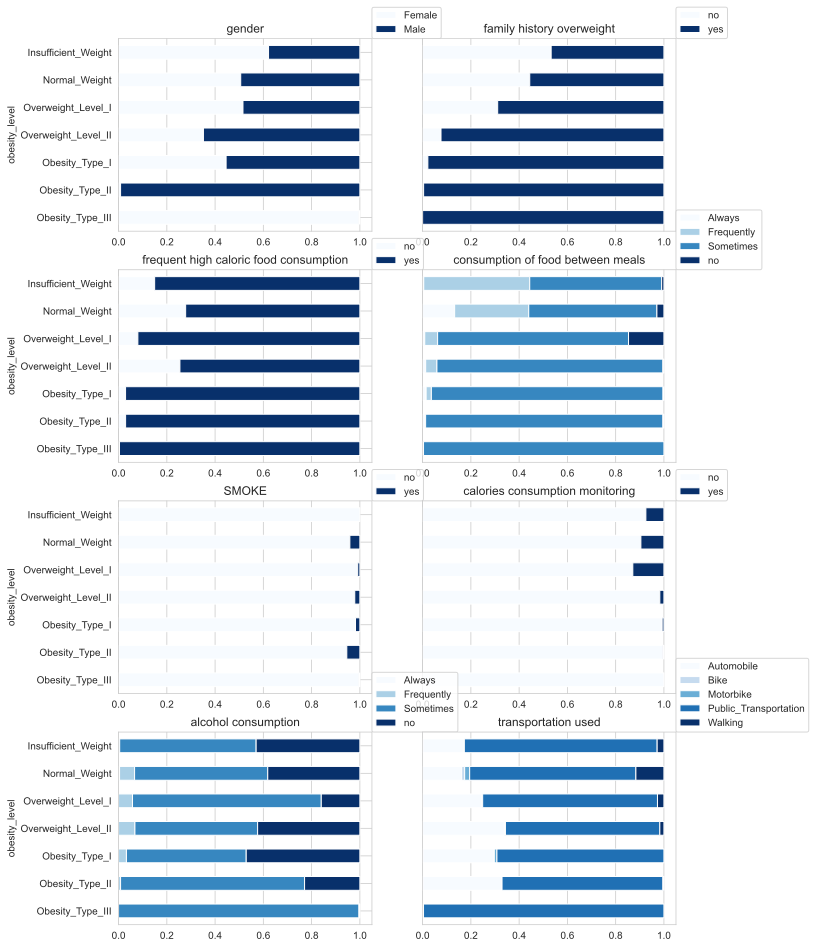

In [97]:
# TODO: pick better colormap.

fig, ax = plt.subplots(4,2, figsize=(10, 16))

i = 0
for column, ax in zip(obesity_categorical.columns[:-1], ax.flatten()):
    counts = obesity_explore.groupby(['obesity_level', column]).size().unstack()
    proportions = counts.div(counts.sum(axis=1), axis=0)
    proportions = proportions.loc[reversed(order)]
    proportions.plot.barh(ax=ax, stacked=True, colormap='Blues').legend(loc=[1.0, 1.0])
    
    if i % 2 != 0:
        ax.set_yticks([])
        ax.set_ylabel(None)
        
    ax.set_title(re.sub('_', ' ', column))
        
    i += 1
        
plt.tight_layout

plt.show();

Most obvious relationships to pop up is again between obesity level and family history overweight with greater proportion of subjects with family history overweight in higher obesity levels:

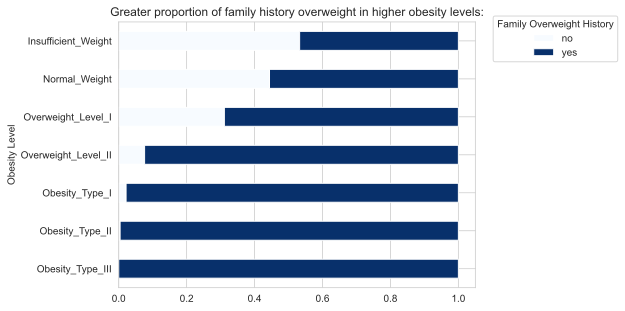

In [98]:
obesity_level_family_history_ctab = obesity_categorical.groupby(['obesity_level', 'family_history_overweight']).size().unstack()
obesity_level_family_history_ctab_proportions = obesity_level_family_history_ctab.div(obesity_level_family_history_ctab.sum(axis=1), axis = 0)
obesity_level_family_history_ctab_proportions.loc[reversed(order)].plot.barh(stacked=True, colormap='Blues').legend(loc=(1.05, 0.85), title='Family Overweight History')

plt.title('Greater proportion of family history overweight in higher obesity levels:')
plt.ylabel('Obesity Level')
plt.show();

We are now left with one last thing -- calculating chi2 tests of independence and Cramer's V between obesity level and every other categorical feature.

In [99]:
# TODO: Finish writing functions. 

def chi_squared_test(df: pd.DataFrame, target: str) -> List[List[float]]:
    """Performs chi-squared test of independence between target and every other categorical column in df."""

    df = df.select_dtypes(include='object')

    chi_squared_results = []
    
    for column in df.drop(target, axis=1).columns:
        crosstab = pd.crosstab(df[target], df[column])
        chi_squared, pvalue = stats.chi2_contingency(crosstab)[:2]
        chi_squared_results.append([chi_squared, pvalue])
    return chi_squared_results


def cramers_v(df: pd.DataFrame, target: str) -> List[float]:
    """Calculates Cramer's V between target and every other categorical column in df.
    
    Cramer's V measures association between categorical variables. 
    Scores range between 0 and 1 with 0 corresponding to no association, 
    and 1 to complete association (one variable is totally 
    determined by another)."""
    
    df = df.select_dtypes(include='object')
    n = len(df)

    cramers_v_results = []
    for column in df.drop(target, axis=1).columns:
        crosstab = pd.crosstab(df[target], df[column])
        chi_squared = stats.chi2_contingency(crosstab)[0]
        cramers_v = np.sqrt( (chi_squared / n) / (min(crosstab.shape) - 1) )
        cramers_v_results.append(cramers_v)
    return cramers_v_results

In [100]:
chi_squared_array = np.array(chi_squared_test(obesity_categorical, 'obesity_level'))
cramers_v_array = np.array(cramers_v(obesity_categorical, 'obesity_level'))

chi_squared_cramers_v_array = np.hstack((chi_squared_array, cramers_v_array.reshape(-1,1)))

pd.DataFrame(chi_squared_cramers_v_array,
             index=obesity_categorical.columns[:-1],
             columns = ['chi2', 'pvalue', 'cramers_v']).sort_values(by='cramers_v', ascending=False)

,chi2,pvalue,cramers_v
gender,530.955445,1.797993e-111,0.559191
family_history_overweight,480.052800,1.663281e-100,0.531711
consumption_of_food_between_meals,701.368647,2.907612e-137,0.371060
frequent_high_caloric_food_consumption,184.712715,3.384163e-37,0.329822
calories_consumption_monitoring,92.442434,9.414984e-18,0.233328
alcohol_consumption,277.302584,2.187710e-48,0.233318
transportation_used,253.914129,2.762665e-40,0.193350
SMOKE,27.655408,1.090921e-04,0.127621


What do we see here? First of all miniscule p-values force us to reject the null hypotheses of independence (as might be expected, considering N is quite huge. Notice, even if one would have applied Bernoulli's correction, p-values would not change meaningfully). All the features display weak to moderate association (positive or negative) with obesity level as additionally suggested by Cramer's V (again not surprisingly -- Cramer's V being derived from chi-squared).

On the face of it, gender seems to be best obesity level predictor. Yet, the relationships is rather complex. For first five categories we see no pronounced differences between the two sexes. However, for the last two i.e. obesity type II and obesity type III we see huge difference with obesity type II almost exclusively occupied by males and obesity type III by females. The difference in the data might be due to real, yet bizarre difference between the sexes or due to some sampling imperfections. 

As for the other features we see differing association scores. Relationships are again quite difficult to comprehend, keeping in mind contigency tables and bar graphs we analyzed before. 

In case of family history overweight, however, the picture seems to be more clear: proportion of subject with family history of overweight grows in subsequent obesity categories.

Before feature engineering dataset let's do one more thing -- look for relationships between the predictors i.e. not relationships predictors have with the target but relationships predictor might have with each other. 

In [101]:
cramers_v_matrix = np.zeros((8,8))

n = len(obesity_categorical)

for i, column1 in enumerate(obesity_categorical.columns[:-1]):
    for j, column2 in enumerate(obesity_categorical.columns[:-1]):
        crosstab = pd.crosstab(obesity_categorical[column1], obesity_categorical[column2])
        chi2 = stats.chi2_contingency(crosstab)[0]
        cramers_v = np.sqrt( (chi2 / n) / (min(crosstab.shape) - 1) )
        cramers_v_matrix[i, j] = cramers_v

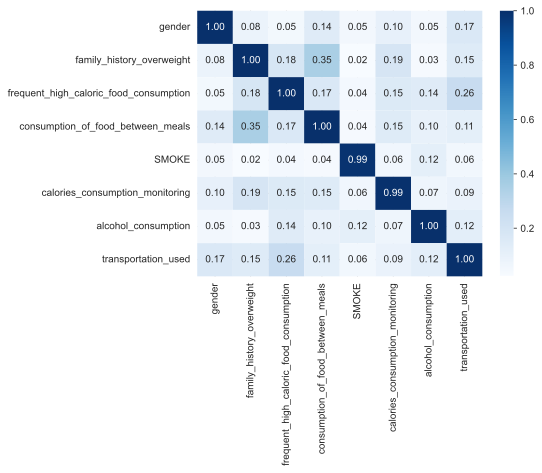

In [102]:
sns.heatmap(cramers_v_matrix,
            annot=True,
            cmap='Blues', 
            xticklabels=obesity_categorical.columns[:-1], 
            yticklabels=obesity_categorical.columns[:-1], 
            fmt='.2f')
plt.show();

Greatest Cramer's V scores we see following combinations:
1. Family history of overweight and consumption of food between the meals.
2. Frequent high-caloric food consumption and transportation used.
3. Family history of overweight and calories consumption monitoring.

Examine contingency tables:

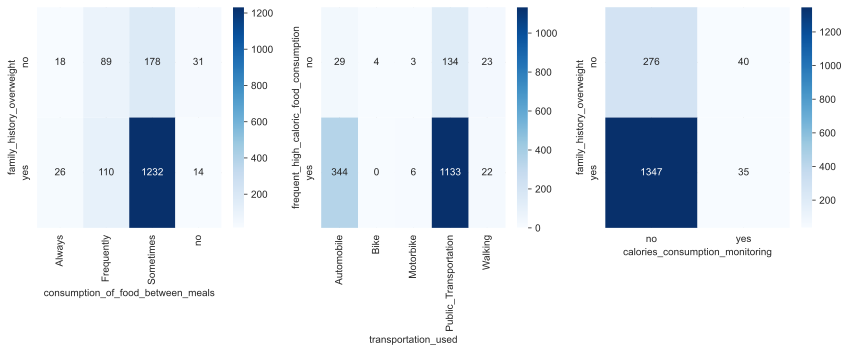

In [103]:
crosstabs = []

feature_combinations = [('family_history_overweight', 'consumption_of_food_between_meals'),
                        ('frequent_high_caloric_food_consumption', 'transportation_used'), 
                        ('family_history_overweight', 'calories_consumption_monitoring')]

for column1, column2 in feature_combinations:
    crosstab = pd.crosstab(obesity_categorical[column1], obesity_categorical[column2])
    crosstabs.append(crosstab)
    
fig, ax = plt.subplots(ncols=3, figsize=(12, 5), dpi=150)

for i, ax in enumerate(ax.flatten()):
    sns.heatmap(crosstabs[i],
                ax=ax,
                annot=True,
                cmap='Blues',
                fmt='d')

plt.tight_layout()
plt.show();

Again it is difficult to make any definitive claims due to differing number of subjects between the groups. Minding the above however notice:
1. Subject with family history of overweight tend to snack between the meals somewhat more often and are somewhat less willing to monitor calories consumption. Possible interpretation would be: families struggling with overweight might display some unfortunate food-related habits.
2. Percentage of subjects walking or biking is inversely related to frequent high-caloric food consumption i.e. persons frequently consuming high-caloric food are less likely to walk or bike instead of using public transportation or car. However, as already noted, due to differences in number of subjects between the groups it is hard to make any definitive claims.

## Feature Engineering

In [104]:
obesity_explore

,gender,age,height,weight,family_history_overweight,frequent_high_caloric_food_consumption,vegetable_consumption_frequency,number_of_main_meals,consumption_of_food_between_meals,SMOKE,daily_water_consumption,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,alcohol_consumption,transportation_used,obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


To make further analyses easier and more efficient, some feature engineering is neccessary:

1. Encode purely categorical columns showing no order with One-Hot Encoder.
2. Transform seemingly continuous, but in fact discrete variables into trully discrete variables.
3. Encode categorical columns showing order with Ordinal Encoder
4. Encode target with Ordinal Encoder.
5. Log-transform specific variables to make its distribution more Gaussian.
6. Standardize all the columns. 

In [105]:
categorical_ordinal_variables_order = ['no', 'Sometimes', 'Frequently', 'Always']
obesity_level_order = ['Insufficient_Weight',
                       'Normal_Weight',
                       'Overweight_Level_I',
                       'Overweight_Level_II',
                       'Obesity_Type_I',
                       'Obesity_Type_II',
                       'Obesity_Type_III']

round_and_encode_pipe = make_pipeline(FunctionTransformer(round, feature_names_out='one-to-one'),
                                      OrdinalEncoder())

log_transformer = FunctionTransformer(np.log, feature_names_out='one-to-one')

# Create ColumnTransformer to preprate data for EDA. Slightly different transformer will be used later in the modelling phase.
eda_transformer = ColumnTransformer([('nominal', OneHotEncoder(), ['gender',
                                                                   'family_history_overweight',
                                                                   'frequent_high_caloric_food_consumption',
                                                                   'SMOKE', 'calories_consumption_monitoring',
                                                                   'transportation_used']),
                                       ('int', round_and_encode_pipe, ['vegetable_consumption_frequency',
                                                                       'number_of_main_meals',
                                                                       'daily_water_consumption',
                                                                       'time_using_technology_devices',
                                                                       'physical_activity_frequency']),
                                       ('ord', OrdinalEncoder(categories=[categorical_ordinal_variables_order,
                                                                          categorical_ordinal_variables_order]), ['consumption_of_food_between_meals',
                                                                                                                  'alcohol_consumption']),
                                       ('label', OrdinalEncoder(categories=[obesity_level_order]) ,['obesity_level']),
                                       ('num', log_transformer, ['age'])],
                                             remainder='passthrough')

In [106]:
obesity_explore_transformed = pd.DataFrame(eda_transformer.fit_transform(obesity_explore), columns = eda_transformer.get_feature_names_out())

In [107]:
# Delete ColumnTransformer prefixes to column names:
obesity_explore_transformed.columns = obesity_explore_transformed.columns.str.replace(re.compile(r'.+__'), '', regex=True)

Having transformed the data, it's time to explore correlations. Instead of opting for Pearson's r or Spearman's rho, we'll employ Kendall's Tau since it's better suited for ordinal data. Let's delve into a simple experiment to observe this.

---

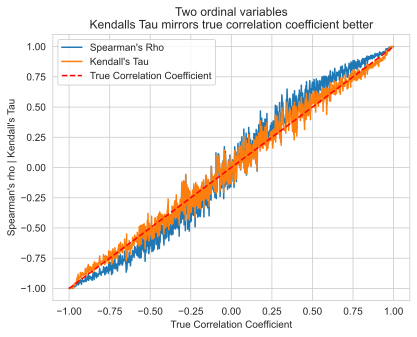

In [108]:
# Two ordinal variables:

N = 100
NUM_EXP = 1000  
corrCoef = np.linspace(-1, 1, NUM_EXP)

exp_result = np.zeros((NUM_EXP, 2))

for i, corr in enumerate(corrCoef):
    varOne = np.random.randint(1, 6, N)
    varTwo =  np.round(varOne * corr + np.random.randn(N)*np.sqrt(1-corr**2))  # Ensures specific correlation holds between two variables.
    exp_result[i, :] = [stats.spearmanr(varOne, varTwo)[0], stats.kendalltau(varOne, varTwo)[0]]

plt.plot(corrCoef, exp_result[:, 0])
plt.plot(corrCoef, exp_result[:, 1])
plt.plot(corrCoef, corrCoef, 'r--')
plt.xlabel('True Correlation Coefficient')
plt.ylabel('Spearman\'s rho | Kendall\'s Tau')
plt.title('Two ordinal variables\nKendalls Tau mirrors true correlation coefficient better')
plt.legend(['Spearman\'s Rho','Kendall\'s Tau', 'True Correlation Coefficient'])
plt.show();

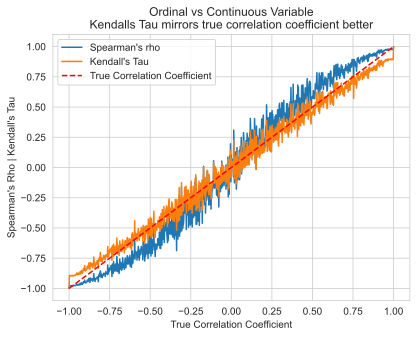

In [109]:
# Ordinal vs Continuous Variable:

N = 100
NUM_EXP = 1000  
corrCoef = np.linspace(-1, 1, NUM_EXP)

exp_result = np.zeros((NUM_EXP, 2))

for i, corr in enumerate(corrCoef):
    varOne = np.random.randint(1, 6, N)
    varTwo =  varOne * corr + np.random.randn(N)*np.sqrt(1-corr**2)  # ensures specific correlation holds between two variables
    exp_result[i, :] = [stats.spearmanr(varOne, varTwo)[0], stats.kendalltau(varOne, varTwo)[0]]

plt.plot(corrCoef, exp_result[:, 0])
plt.plot(corrCoef, exp_result[:, 1])
plt.plot(corrCoef, corrCoef, 'r--')
plt.xlabel('True Correlation Coefficient')
plt.ylabel('Spearman\'s Rho | Kendall\'s Tau')
plt.title('Ordinal vs Continuous Variable\nKendalls Tau mirrors true correlation coefficient better')
plt.legend(['Spearman\'s rho','Kendall\'s Tau', 'True Correlation Coefficient'])
plt.show();

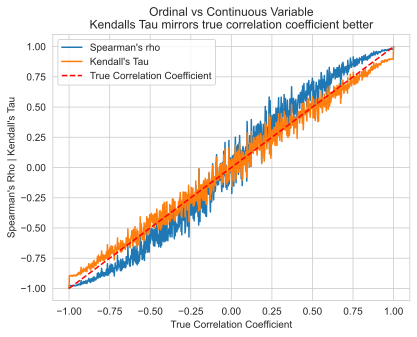

In [110]:
# Ordinal vs Continuous Variable:

N = 100
NUM_EXP = 1000  
corrCoef = np.linspace(-1, 1, NUM_EXP)

exp_result = np.zeros((NUM_EXP, 2))

for i, corr in enumerate(corrCoef):
    varOne = np.random.randint(1, 6, N)
    varTwo =  varOne * corr + np.random.randn(N)*np.sqrt(1-corr**2)  # ensures specific correlation holds between two variables
    exp_result[i, :] = [stats.spearmanr(varOne, varTwo)[0], stats.kendalltau(varOne, varTwo)[0]]

plt.plot(corrCoef, exp_result[:, 0])
plt.plot(corrCoef, exp_result[:, 1])
plt.plot(corrCoef, corrCoef, 'r--')
plt.xlabel('True Correlation Coefficient')
plt.ylabel('Spearman\'s Rho | Kendall\'s Tau')
plt.title('Ordinal vs Continuous Variable\nKendalls Tau mirrors true correlation coefficient better')
plt.legend(['Spearman\'s rho','Kendall\'s Tau', 'True Correlation Coefficient'])
plt.show();

Kendall's Tau seems reflect true correlation coefficient better hence we will use it in subsequent analyses.

---

In [111]:
corr_transformed_columns = obesity_explore_transformed.corr(method='kendall')

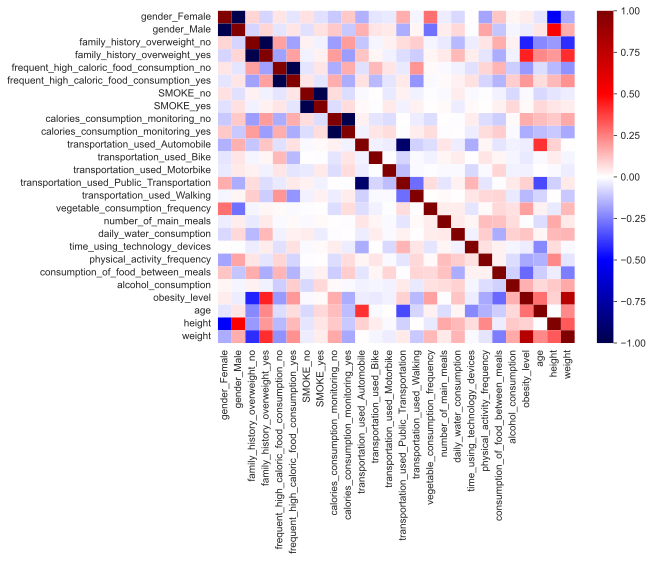

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_transformed_columns, cmap='seismic')
plt.show();

For now let's just concentrate on correlations between the features and not between the features and the target. 
Notice positive moderate correlation between family history of overweight and weight. Since, we have already linked family history of overweight with obesity, obesity, in turn, with weight, the result is not at all surprising.

Also, gender is correlated with height, age with transportation, older people commuting by cars -- usually only people of certain age have financial means to buy a car.

Examine how features correlate with target:

In [113]:
obesity_explore_transformed.corr(method='kendall')['obesity_level'].sort_values(ascending=False)[1:]

weight                                        0.783612
family_history_overweight_yes                 0.431969
age                                           0.277718
frequent_high_caloric_food_consumption_yes    0.202907
vegetable_consumption_frequency               0.186570
calories_consumption_monitoring_no            0.160989
alcohol_consumption                           0.150019
daily_water_consumption                       0.110959
transportation_used_Public_Transportation     0.090382
height                                        0.089019
gender_Female                                 0.037191
SMOKE_yes                                     0.013225
number_of_main_meals                         -0.001453
SMOKE_no                                     -0.013225
transportation_used_Motorbike                -0.029327
transportation_used_Automobile               -0.033236
gender_Male                                  -0.037191
time_using_technology_devices                -0.037636
transporta

Most important predictors of obesity seem to be: weight, family history overweight, age, consumption of food between the meals (negative correlation), and frequent high-caloric food consumption.

Rather counterintuitive result is negative correlation of obesity with consumption of food between the meals. As we have already seen however people with insuficient and normal weight tend to snack a little more often. For remaining obesity levels snacking "sometimes" is by far the most prevalent category. 

While considering results it's essential to remember the following: Kendall's Tau works for two ordinal variables and for ordinal vs continuous variable. It's not suited for ordinal vs binary variable. However, we have already examined relationships between two categorical and categorical vs binary variables using Cramer's V. To recap, features most strongly correlated with obesity were: gender, family history of overweight, consumption of food between the meals and freuent high-caloric food consumption. Examining graphs showed problematic nature of obesity-gender relationship -- clear pattern can only be observed at two highest levels of obesity. One can suspect some problem with data collection here and it can sway correlation coefficient towards higher values. 

Given the abundance of features, some of which are not only correlated with obesity levels but also with each other, it would be beneficial to explore partial correlations. Partial correlation analysis allows us to examine the relationships between features while accounting for the influence of other variables. 

In this instance, we'll opt for Spearman's rho since pingouin's pcorr function exclusively computes Pearson's correlation coefficient. Converting it to Spearman's rho is a straightforward process through rank-transforming the data and subsequently computing Pearson's correlation coefficient on the transformed ranks. It's worth noting that while this method seamlessly facilitates Spearman's rho calculations, it doesn't extend to Kendall's Tau.

In [114]:
def rank_transform(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rank-transforms all the columns in df.

    Function utilizes scipy.stats.rankdata() function.
    """

    df_rank = df.apply(stats.rankdata)
    return df_rank

In [115]:
rank_transform(obesity_explore_transformed).pcorr()['obesity_level'].sort_values(ascending=False)[1:]

weight                                        0.963682
family_history_overweight_yes                 0.173473
gender_Female                                 0.157722
age                                           0.123486
number_of_main_meals                          0.122967
transportation_used_Motorbike                 0.066946
vegetable_consumption_frequency               0.064750
time_using_technology_devices                 0.053507
SMOKE_no                                      0.040579
calories_consumption_monitoring_no            0.037748
frequent_high_caloric_food_consumption_no     0.013594
transportation_used_Public_Transportation    -0.004073
transportation_used_Bike                     -0.007412
frequent_high_caloric_food_consumption_yes   -0.013594
calories_consumption_monitoring_yes          -0.037748
SMOKE_yes                                    -0.040579
transportation_used_Automobile               -0.049625
transportation_used_Walking                  -0.052627
alcohol_co

Despite adjusting for other variables, weight maintains a notably robust positive correlation. The subsequent strongest (yet significantly weaker) positive correlations persist with the presence of a family history of overweight, gender, and age. Intriguingly, upon isolating the effects of other factors, height exhibits a considerable negative correlation with weight, followed by the frequency of consuming food between meals. Spearman rho might not be the best way to measure correlation between mix of continuous, categorical, and binary variables however results we obtained here roughly accord with ones obtained earlier when we performed Kendall's Tau, Cramver's V and visually inspected various graphs.

To wrap up: The only trully robust yet rather obvious predictor of obesity level is weight. Other important factors might be: height (most probably due to specific procedures of calculating obesity level, where one divides weight by some transformation of height), family history of overweight, age, consumption of food between the meals, and perhaps gender (however, in the context of gender correlations, it's likely that any observed correlations stem from issues with the representativeness of the data).

# Model

Let's first set baseline to compare classifiers to. 

In [116]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)

X = obesity_explore_transformed.drop('obesity_level', axis=1)
y = obesity_explore_transformed['obesity_level'].copy()

cvs = cross_val_score(DummyClassifier(), X, y, cv=kfold, scoring='accuracy')
print(cvs, end='\n\n')
print(cvs.mean())

[0.18823529 0.18235294 0.11764706 0.14705882 0.14705882 0.19411765
 0.14705882 0.13529412 0.19526627 0.10650888]

0.15605986773407587


Difference between encodings

In [117]:
cvs = cross_val_score(SGDClassifier(random_state=42), X, y, cv=kfold, scoring='accuracy')
print(cvs, end='\n\n')
print(cvs.mean())

[0.43529412 0.35294118 0.16470588 0.58235294 0.40588235 0.64705882
 0.31176471 0.49411765 0.50887574 0.42011834]

0.432311172989906


In [118]:
bin_and_one_hot = make_pipeline(FunctionTransformer(func=round, feature_names_out='one-to-one'),
                                  OneHotEncoder(drop='first'))

log_transformer = make_pipeline(FunctionTransformer(func=np.log, inverse_func=np.exp, feature_names_out='one-to-one'), 
                                StandardScaler())


preprocessing = ColumnTransformer([('one_hot_binary', OneHotEncoder(drop='first'), ['gender',
                                                                 'family_history_overweight',
                                                                 'frequent_high_caloric_food_consumption',
                                                                 'SMOKE', 
                                                                 'transportation_used', 
                                                                 'calories_consumption_monitoring']),
                                   ('one_hot', OneHotEncoder(categories=[['Always', 'Frequently', 'Sometimes', 'no'],
                                                                         ['Always', 'Frequently', 'Sometimes', 'no']], drop='first'), ['consumption_of_food_between_meals', 
                                                                                                                                     'alcohol_consumption']),
                                   ('bin_and_one_hot', bin_and_one_hot, ['vegetable_consumption_frequency',
                                                                         'number_of_main_meals',
                                                                         'daily_water_consumption',
                                                                         'time_using_technology_devices',
                                                                         'physical_activity_frequency']), 
                                  ('log_transform', log_transformer, ['age']), 
                                  ('scale', StandardScaler(), ['height', 'weight'])], 
                                  remainder=StandardScaler())

In [119]:
X = obesity_explore.drop('obesity_level', axis=1)
y = obesity_explore['obesity_level'].copy()

In [120]:
prep_sgd = make_pipeline(preprocessing, SGDClassifier(random_state=42))
cvs = cross_val_score(prep_sgd, X, y, cv=kfold, scoring='accuracy')
print(cvs, end='\n\n')
print(cvs.mean())

[0.70588235 0.68823529 0.74117647 0.67647059 0.69411765 0.68823529
 0.7        0.68823529 0.73372781 0.75147929]

0.7067560041768186


We've achieved a notably improved result! While the classifier remains the same as before, we've made a slight adjustment to the preprocessing stage. Now, all categorical variables are encoded using OneHotEncoding, and suitable columns have been standardized using StandardScaler(). 

In [121]:
def column_ratio(X):
    return np.array(X.iloc[:, 1] / X.iloc[:, 0]).reshape(-1,1)

def ratio_name(function_transformer, feature_names_in):
    return ['weight_to_height']

ratio_transformer = FunctionTransformer(column_ratio, feature_names_out=ratio_name)

ratio_pipeline = make_pipeline(ratio_transformer, StandardScaler())

bin_and_one_hot = make_pipeline(FunctionTransformer(func=round, feature_names_out='one-to-one'),
                                  OneHotEncoder(drop='first'))

log_transformer = make_pipeline(FunctionTransformer(func=np.log, inverse_func=np.exp, feature_names_out='one-to-one'), 
                                StandardScaler())

preprocessing_ratio = ColumnTransformer([('one_hot_binary', OneHotEncoder(drop='first'), ['gender',
                                                                 'family_history_overweight',
                                                                 'frequent_high_caloric_food_consumption',
                                                                 'SMOKE', 
                                                                 'transportation_used', 
                                                                 'calories_consumption_monitoring']),
                                   ('one_hot', OneHotEncoder(categories=[['Always', 'Frequently', 'Sometimes', 'no'],
                                                                         ['Always', 'Frequently', 'Sometimes', 'no']], drop='first'), ['consumption_of_food_between_meals', 
                                                                                                                                     'alcohol_consumption']),
                                   ('bin_and_one_hot', bin_and_one_hot, ['vegetable_consumption_frequency',
                                                                         'number_of_main_meals',
                                                                         'daily_water_consumption',
                                                                         'time_using_technology_devices',
                                                                         'physical_activity_frequency']), 
                                  ('log_transform', log_transformer, ['age']),
                                  ('scale', StandardScaler(), ['height', 'weight']),
                                  ('ratio', ratio_pipeline, ['height', 'weight'])], 
                                  remainder='passthrough')

In [122]:
prep_sgd = make_pipeline(preprocessing_ratio, SGDClassifier(random_state=42))
cvs = cross_val_score(prep_sgd, X, y, cv=kfold, scoring='accuracy')
print(cvs, end='\n\n')
print(cvs.mean())

[0.68235294 0.66470588 0.77058824 0.70588235 0.67647059 0.77647059
 0.72941176 0.78823529 0.78106509 0.74556213]

0.7320744865993735


Slightly better! With this enhancement, let's proceed to explore several models to determine the optimal one. But before we delve into that, let's begin by crafting a helper function.

In [123]:
T = TypeVar('T')

def model_performance(estimator: BaseEstimator(), data:pd.DataFrame, label:str, preprocessing: ColumnTransformer=None) -> T:
    """
    Return model performance metrics. 

    Parameters:
    --------------------------------
    estimator: Any Scikit-Learn Classification Estimator implementing fit and predict methods.
    data: Data Frame as pd.DataFrame.
    label: target column as a string.
    """

    X = data.drop('obesity_level', axis=1)
    y = data['obesity_level'].copy()

    if preprocessing is None:
        clf = estimator
    else:
        clf = make_pipeline(preprocessing, estimator)

    kfold = KFold(n_splits=10, shuffle=True, random_state=101)
    cvs = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
    y_pred = cross_val_predict(clf, X, y, cv=kfold)

    print('Cross Validation Scores:')
    print(cvs)
    print(f'Mean Cross Validation Score: {cvs.mean()}')
    print('\n')
    print(classification_report(y, y_pred))

In [124]:
# SGD Linear SVM 
model_performance(SGDClassifier(random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.68235294 0.66470588 0.77058824 0.70588235 0.67647059 0.77647059
 0.72941176 0.78823529 0.78106509 0.74556213]
Mean Cross Validation Score: 0.7320744865993735


                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.95       214
      Normal_Weight       0.56      0.70      0.62       241
     Obesity_Type_I       0.73      0.48      0.58       276
    Obesity_Type_II       0.92      0.97      0.95       240
   Obesity_Type_III       1.00      0.99      0.99       266
 Overweight_Level_I       0.56      0.46      0.50       225
Overweight_Level_II       0.47      0.58      0.52       236

           accuracy                           0.73      1698
          macro avg       0.74      0.73      0.73      1698
       weighted avg       0.74      0.73      0.73      1698



In [125]:
# SGD Logistic Regression
model_performance(SGDClassifier(loss='log_loss', random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.69411765 0.70588235 0.79411765 0.72941176 0.76470588 0.72352941
 0.75882353 0.72352941 0.69822485 0.78106509]
Mean Cross Validation Score: 0.7373407587887225


                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95       214
      Normal_Weight       0.55      0.70      0.62       241
     Obesity_Type_I       0.69      0.58      0.63       276
    Obesity_Type_II       0.92      0.96      0.94       240
   Obesity_Type_III       1.00      1.00      1.00       266
 Overweight_Level_I       0.61      0.47      0.53       225
Overweight_Level_II       0.47      0.51      0.49       236

           accuracy                           0.74      1698
          macro avg       0.74      0.74      0.74      1698
       weighted avg       0.74      0.74      0.74      1698



In [126]:
# K Nearest Neighbors
model_performance(KNeighborsClassifier(), obesity_explore, 'obesity_level', preprocessing_ratio)

  File "C:\Users\jacok\anaconda3\envs\ML_course_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Cross Validation Scores:
[0.81176471 0.84117647 0.87647059 0.86470588 0.81764706 0.84705882
 0.85882353 0.88235294 0.86390533 0.84023669]
Mean Cross Validation Score: 0.850414201183432


                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.96      0.88       214
      Normal_Weight       0.79      0.54      0.64       241
     Obesity_Type_I       0.85      0.89      0.87       276
    Obesity_Type_II       0.93      0.98      0.95       240
   Obesity_Type_III       1.00      1.00      1.00       266
 Overweight_Level_I       0.72      0.77      0.75       225
Overweight_Level_II       0.81      0.80      0.80       236

           accuracy                           0.85      1698
          macro avg       0.84      0.85      0.84      1698
       weighted avg       0.85      0.85      0.85      1698



In [127]:
# rbf SVC
model_performance(SVC(random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.92352941 0.95294118 0.95882353 0.94705882 0.94117647 0.95882353
 0.95882353 0.96470588 0.95266272 0.95857988]
Mean Cross Validation Score: 0.9517124956491472


                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.97      0.95       214
      Normal_Weight       0.91      0.88      0.89       241
     Obesity_Type_I       0.99      0.95      0.97       276
    Obesity_Type_II       0.98      0.99      0.98       240
   Obesity_Type_III       1.00      1.00      1.00       266
 Overweight_Level_I       0.90      0.90      0.90       225
Overweight_Level_II       0.94      0.96      0.95       236

           accuracy                           0.95      1698
          macro avg       0.95      0.95      0.95      1698
       weighted avg       0.95      0.95      0.95      1698



In [128]:
# Decision Tree
model_performance(DecisionTreeClassifier(random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.95294118 0.95294118 0.97058824 0.95294118 0.94705882 0.92941176
 0.97058824 0.92352941 0.9408284  0.9408284 ]
Mean Cross Validation Score: 0.9481656804733726


                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.97      0.96       214
      Normal_Weight       0.92      0.91      0.91       241
     Obesity_Type_I       0.96      0.95      0.96       276
    Obesity_Type_II       0.97      0.97      0.97       240
   Obesity_Type_III       0.99      1.00      0.99       266
 Overweight_Level_I       0.91      0.90      0.91       225
Overweight_Level_II       0.93      0.93      0.93       236

           accuracy                           0.95      1698
          macro avg       0.95      0.95      0.95      1698
       weighted avg       0.95      0.95      0.95      1698



In [129]:
# Random Forest
model_performance(RandomForestClassifier(random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.95294118 0.95294118 0.97647059 0.92941176 0.96470588 0.99411765
 0.95882353 0.95882353 0.95857988 0.96449704]
Mean Cross Validation Score: 0.9611312217194572


                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.97      0.96       214
      Normal_Weight       0.88      0.92      0.90       241
     Obesity_Type_I       0.99      0.99      0.99       276
    Obesity_Type_II       0.99      0.99      0.99       240
   Obesity_Type_III       1.00      1.00      1.00       266
 Overweight_Level_I       0.94      0.90      0.92       225
Overweight_Level_II       0.97      0.96      0.96       236

           accuracy                           0.96      1698
          macro avg       0.96      0.96      0.96      1698
       weighted avg       0.96      0.96      0.96      1698



It's fascinating how the weight to height ratio emerged as the primary predictor, followed by weight, height, age, and gender in our analysis. Upon considering the significance of height in our partial correlations and its previous correlation with gender, it seems plausible that part of the gender effect could stem from its association with height.

Observing that many men are categorized in obesity type II while women are in obesity type III prompts speculation. Perhaps this variation isn't solely due to data representation but rather how we measure it—potentially a ratio between weight and height. Given men generally have greater height, more of them might fall into obesity type II rather than type III.

In [130]:
# Gradient Boosting Classifier
model_performance(GradientBoostingClassifier(random_state=42), obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.95882353 0.96470588 0.98235294 0.96470588 0.94705882 0.96470588
 0.98235294 0.95294118 0.95857988 0.98224852]
Mean Cross Validation Score: 0.9658475461190392


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.98       214
      Normal_Weight       0.95      0.94      0.94       241
     Obesity_Type_I       0.97      0.98      0.97       276
    Obesity_Type_II       0.99      0.98      0.99       240
   Obesity_Type_III       1.00      0.99      0.99       266
 Overweight_Level_I       0.92      0.94      0.93       225
Overweight_Level_II       0.95      0.95      0.95       236

           accuracy                           0.97      1698
          macro avg       0.97      0.96      0.97      1698
       weighted avg       0.97      0.97      0.97      1698



In [131]:
# Since Adaptive Boosting is designed for binary classification one needs to perform 
# multilabel classification manually using One Vs Rest:
AdaBoostOneVsRest = OneVsRestClassifier(AdaBoostClassifier(random_state=42))
model_performance(AdaBoostOneVsRest, obesity_explore, 'obesity_level', preprocessing_ratio)

Cross Validation Scores:
[0.94705882 0.94117647 0.95882353 0.97058824 0.91764706 0.98235294
 0.96470588 0.95294118 0.95266272 0.9704142 ]
Mean Cross Validation Score: 0.9558371040723982


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97       214
      Normal_Weight       0.93      0.93      0.93       241
     Obesity_Type_I       0.96      0.97      0.97       276
    Obesity_Type_II       0.98      0.97      0.97       240
   Obesity_Type_III       0.99      1.00      0.99       266
 Overweight_Level_I       0.91      0.90      0.91       225
Overweight_Level_II       0.93      0.95      0.94       236

           accuracy                           0.96      1698
          macro avg       0.95      0.95      0.95      1698
       weighted avg       0.96      0.96      0.96      1698



Gradient Boosting Classifier turned out to be the best. Let's try to tweak some parameters to improve its score even more.

# Parameter Tuning

In [132]:
gb_base_pipeline = Pipeline([('preprocessing', preprocessing_ratio), 
                                      ('clf', GradientBoostingClassifier(random_state=42))])

param_grid = {'clf__n_estimators': [200, 210, 230, 240, 250],
               'clf__min_samples_split': [9, 10, 11],
               'clf__min_samples_leaf': [3, 4, 5], 
               'clf__max_depth': [3, 4, 5]}

rnd_search = GridSearchCV(gb_base_pipeline, 
                          param_grid=param_grid,
                          cv=3, 
                          scoring='f1_weighted')

rnd_search.fit(X, y)
gb_best = rnd_search.best_estimator_

In [133]:
rnd_search.best_params_

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 4,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 200}

In [134]:
model_performance(gb_best, obesity_explore, 'obesity_level')

Cross Validation Scores:
[0.96470588 0.95294118 0.98235294 0.98235294 0.97647059 0.97058824
 0.98235294 0.94705882 0.9704142  0.98816568]
Mean Cross Validation Score: 0.9717403411068568


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.98       214
      Normal_Weight       0.95      0.95      0.95       241
     Obesity_Type_I       0.98      0.98      0.98       276
    Obesity_Type_II       1.00      0.99      0.99       240
   Obesity_Type_III       1.00      0.99      0.99       266
 Overweight_Level_I       0.94      0.94      0.94       225
Overweight_Level_II       0.95      0.97      0.96       236

           accuracy                           0.97      1698
          macro avg       0.97      0.97      0.97      1698
       weighted avg       0.97      0.97      0.97      1698



Slightly better model. Let's examine errors. 

In [146]:
y_pred = cross_val_predict(gb_best, X, y, cv=kfold)

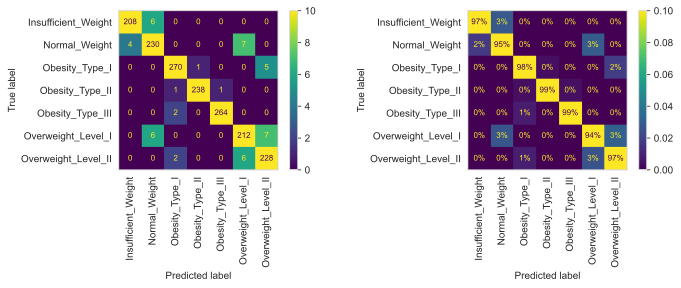

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y, y_pred,
                                        xticks_rotation='vertical',
                                        text_kw={'size': 8},
                                        im_kw={'vmin':0, 'vmax': 10}, 
                                        ax=ax[0])
ax[0].grid(False)


ConfusionMatrixDisplay.from_predictions(y, y_pred,
                                        xticks_rotation='vertical',
                                        normalize='true',
                                        values_format='.0%',
                                        ax=ax[1], 
                                        text_kw={'size': 8}, 
                                        im_kw={'vmin':0, 'vmax':.1})
ax[1].grid(False)
plt.tight_layout()
plt.show();

Model sometimes, but rarely, makes mistakes. When it does, it mistakes Normal Weight with both Insufficient Weight and Overweight Type I, Obesity Type I with Overweight type II, and Overweight Type I with Overweight Type II. 

Now examine errors only:

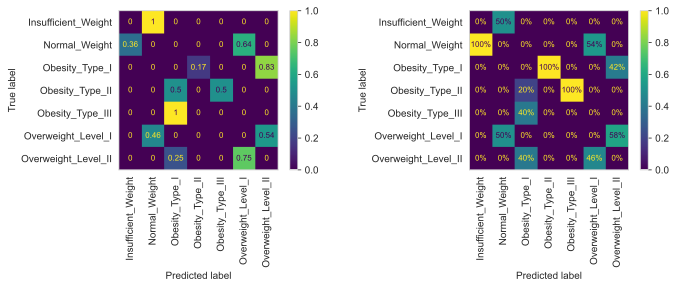

In [157]:
sample_weight = y != y_pred

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y, y_pred,
                                        sample_weight=sample_weight,
                                        normalize='true',
                                        xticks_rotation='vertical',
                                        text_kw={'size': 8}, 
                                        ax=ax[0])
ax[0].grid(False)


ConfusionMatrixDisplay.from_predictions(y, y_pred,
                                        sample_weight=sample_weight,
                                        normalize='pred',
                                        xticks_rotation='vertical',
                                        values_format='.0%', 
                                        text_kw={'size': 8}, 
                                        ax=ax[1])
ax[1].grid(False)
plt.tight_layout()
plt.show();

Left:
* Of all the errors done during classifying Insufficient Weight example 100% is predicting Normal Weight.
* Of all the errors done during classifying Normal Weight, 64% is predicting Overweight Type I and 36% Insufficient Weight.
* Of all the errors done during classifying Obesity Type I 83% is predicting Overweight Level II and 17% Obesity Type II.
* Of all the errors done during classifying Obesity Type II 50% is predicting Obesity Type I and 50% Obesity Type III.
* Of all the errors done during classifying Obesity Type III 100% is predicting Obesity Type I. Interesting!
* Of all the errors done during classifying Overweight Level I 46% is predicting Normal Weight and 54% Overweight Level II.
* Of all the errors done during classifying Overweight Level II 75% is predicting Overweight Level I and 25% Obesity Type I.

Thus errors tend to be group at category junctions. One interesting thing is mistaking Obesity Type III with Obesity Type I skipping Obesity Type II. 

Right:
* Of all the wrong predictions of Insufficient Weight, 100% are predictions of Normal Weight.
* From all the wrong predictions of Normal Weights, 50% are predictions of Insufficient Weight and 50% of Overweight Level I.
* Of all the wrong predictions of Obesity Type I, 40% are predictions of Overweight Level II, 20% are of Obesity Type II, and interestingly 40% are of Obesity Type III.
* Of all the wrong predictions of Obesity Type II, 100% are predictions of Obesity Type I.
* Of all the wrong predictions of Obesity Type III, 100% are predictions of Obesity Type II.
* Of all the wrong predictions of Overweight Level I, 54% are predictions of Normal Weight and 46% of Overweight Level II.
* Of all the wrong predictions of Overweight Level II, 58% are predictions of Overweight Level I and 42% of Obesity Type I.

Errors are often found at category boundaries, but an interesting pattern emerges when the model predicts Obesity Type I. It frequently confuses Obesity Type III for Obesity Type I, whereas one might anticipate confusing Obesity Type III with Obesity Type II. Additionally, when the model predicts Obesity Type II, misclassifications primarily involve confusing Obesity Type I rather than Obesity Type III.

While the model's overall performance is commendable, enhancing data collection at category boundaries could furth improve its accuracy.

Before saving the model, it's a good idea to retrain it on the entire training set and then evaluate its performance on the test set. This ensures that the model is utilizing all available data for training and provides a final assessment of its generalization ability on unseen data.

..

In [158]:
X = obesity_explore.drop('obesity_level', axis=1)
y = obesity_explore['obesity_level'].copy()
gb_best.fit(X, y)

X_test = test_set.drop('obesity_level', axis=1)
y_test = test_set['obesity_level'].copy()

y_pred = gb_best.predict(X_test)

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        58
      Normal_Weight       0.93      0.93      0.93        46
     Obesity_Type_I       0.97      0.99      0.98        75
    Obesity_Type_II       1.00      0.98      0.99        57
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.97      0.91      0.94        65
Overweight_Level_II       0.93      0.96      0.95        54

           accuracy                           0.97       413
          macro avg       0.97      0.97      0.97       413
       weighted avg       0.97      0.97      0.97       413



In [159]:
# Save the model using cloudpickle
with open('preprocessing.pkl', 'wb') as f:
    cloudpickle.dump(gb_best['preprocessing'], f)

with open('final_model.pkl', 'wb') as f:
    cloudpickle.dump(gb_best, f)